# Introduction to Gaussian Processes

Welcome to my blog post documenting my journey into the fascinating world of **Gaussian Processes (GPs)**!

As a beginner, I'm finding that the best way to grasp these concepts is to break them down, understand the theory from lectures, and then immediately translate that into working code.

Gaussian Processes are a powerful tool in probabilistic machine learning. Unlike many models that give you a single prediction, GPs provide a **distribution over possible outcomes**. This means they not only tell you what they think the answer is, but also how certain they are about that answer.

Think of it like this: instead of fitting a single line or curve to data, a GP fits a **distribution of possible lines or curves** that could have generated the data.

## Recap: Probabilistic Parametric Regression

Before we dive fully into GPs, let's quickly revisit a concept we might be familiar with: **probabilistic parametric regression**. This will help us see how GPs are different and why they are useful.

In parametric regression, we assume our data can be described by a function with a fixed form, determined by a set of parameters. A common example is a linear model with basis functions:

$$
f(x) = \phi(x)^T w
$$

Here, $\phi(x)$ is a vector of features or basis functions (like $1, x, x^2$, etc.), and $w$ is a vector of weights or parameters that we want to learn.

In a probabilistic setting, we don't just find a single best value for $w$. Instead, we treat $w$ as a random variable and place a prior probability distribution over it, often a Gaussian:

$$
p(w) = \mathcal{N}(w; \mu, \Sigma)
$$

We also assume that our observations $y$ are related to the true function values $f(x)$ with some noise, typically modeled as Gaussian noise:

$$
p(y \mid f) = \mathcal{N}(y; f_x, \sigma^2 I)
$$

Given some training data $(X, y)$, where $X$ is a matrix of inputs and $y$ is a vector of corresponding outputs, we can use Bayes' theorem to find the posterior distribution over the weights $w$:

$$
p(w \mid y, \Phi_X) = \frac{p(y \mid \Phi_X, w) p(w)}{p(y \mid \Phi_X)}
$$

For Gaussian priors and likelihoods, the posterior distribution over $w$ is also Gaussian, $\mathcal{N}(w; \mu_y, \Sigma_y)$. The formulas for the posterior mean $\mu_y$ and covariance $\Sigma_y$ are:

$$
\mu_y = \mu + \Sigma \Phi_X (\Phi_X^T \Sigma \Phi_X + \sigma^2 I)^{-1} (y - \Phi_X^T \mu)
$$

$$
\Sigma_y = \Sigma - \Sigma \Phi_X (\Phi_X^T \Sigma \Phi_X + \sigma^2 I)^{-1} \Phi_X^T \Sigma
$$

Once we have the posterior distribution over $w$, we can make predictions for a new input $x$. The distribution over the function value $f_x$ at this new point is also Gaussian:

$$
p(f_x \mid y, \phi_x) = \mathcal{N}(f_x; \phi_x^T \mu_y, \phi_x^T \Sigma_y \phi_x)
$$

**Key takeaway:** In parametric regression, we are learning a fixed number of parameters $w$. The complexity of the model is determined by the number and type of features $\phi(x)$.

## Connecting to Shallow Learning

Interestingly, the probabilistic parametric regression model we just discussed has a close connection to simple neural networks.

A linear model with basis functions can be seen as a **single-layer neural network** where the basis functions $\phi(x)$ are fixed non-linear transformations of the input, and the weights $w$ are the parameters of the output layer.

Minimizing the negative log-posterior of the weights $w$ with Gaussian prior and likelihood is equivalent to minimizing a regularized squared error loss function. The loss function $L(w)$ is related to the negative log-posterior:

$$
-\log p(w \mid y, X) \propto \frac{1}{2\sigma^2} \sum_{i=1}^n \left| y_i - \phi(x_i)^T w \right|^2 + \frac{1}{2} (w - \mu)^T \Sigma^{-1} (w - \mu)
$$

- The first term is the squared error between the observed outputs and the model's predictions, scaled by the noise variance.
- The second term is a regularization term based on the prior over $w$.

Finding the weights $w^*$ that minimize this loss function (the **Maximum A Posteriori** or MAP estimate) involves setting the gradient of the loss with respect to $w$ to zero:

$$
\nabla_w \left( -\log p(w \mid y, X) \right) = 0
$$

The solution for $w^*$ is given by:

$$
w^* = \left( \sigma^{-2} \Phi_X \Phi_X^T + \Sigma^{-1} \right)^{-1} \left( \sigma^{-2} \Phi_X y + \Sigma^{-1} \mu \right)
$$

The curvature of the loss function at the minimum is related to the posterior covariance of $w$.

---

**Derivation**

$$p(w | y, X) = \frac{1}{p(y)} \mathcal{N}(y | \phi_X^T w, \sigma I) \mathcal{N}(w; \mu, \Sigma)$$

$$- \log p(w | y, X) = - \log \mathcal{N}(y | \phi_X^T w, \sigma I) - \log \mathcal{N}(w; \mu, \Sigma) + \text{const.}$$

$$\log p(w | y, X) \triangleq -\frac{1}{2\sigma^2} ||y - \phi_X^T w||^2 - \frac{1}{2} (w - \mu)^T \Sigma^{-1} (w - \mu)$$

$$\nabla \log p(w | y, X) = \frac{1}{\sigma^2} \phi_X (y - \phi_X^T w) - \Sigma^{-1} (w - \mu) = (\sigma^{-2} \phi_X \phi_X^T + \Sigma^{-1}) w - \sigma^{-2} \phi_X y - \Sigma^{-1} \mu = 0$$

$$w_* = (\sigma^{-2} \phi_X \phi_X^T + \Sigma^{-1})^{-1} (\sigma^{-2} \phi_X y + \Sigma^{-1} \mu)$$

$$\nabla \nabla^T \log p(w | y, X) = \sigma^{-2} \phi_X \phi_X^T + \Sigma^{-1}$$

**Hence**

$$p(w | y, X) = \frac{1}{p(y)} \mathcal{N}(y | \phi_X^T w, \sigma I) \mathcal{N}(w; \mu, \Sigma)$$

$$= \mathcal{N}(w; w_* := \arg \min \mathcal{L}(y, X), \nabla \nabla^T \mathcal{L}(y, X))$$

---

This connection highlights that our parametric model is essentially a form of **"shallow" learning** (a single layer). We have two ways to increase the model's capacity:

1. Add more features $\phi(x)$.
2. Add more layers (move to deep learning).

**Gaussian Processes offer an alternative perspective by moving away from a fixed, finite set of parameters $w$.**

## Towards a Distribution Over Functions

Instead of defining a function through a finite set of parameters $w$, what if we could define a probability distribution directly over the space of functions? This is where **Gaussian Processes** come in.

A **Gaussian Process (GP)** is a probability distribution over functions $f: \mathcal{X} \to \mathbb{R}$. The key property of a GP is that any finite collection of function values evaluated at a set of input points $X = [x_1, \ldots, x_N]$ has a joint multivariate Gaussian distribution.

So, if we pick any $N$ points $x_1, \ldots, x_N$, the vector of function values
$$
\mathbf{f}_X = [f(x_1), \ldots, f(x_N)]^T
$$
follows a Gaussian distribution:
$$
p(\mathbf{f}_X) = \mathcal{N}(\mathbf{f}_X; \mathbf{m}_X, K_{XX})
$$

Here:
- $\mathbf{m}_X$ is a vector where the $i$-th element is the mean function evaluated at $x_i$, i.e., $m(x_i)$.
- $K_{XX}$ is the covariance matrix, where the element at row $i$ and column $j$ is given by a covariance function or kernel $k(x_i, x_j)$.

The **mean function** $m(x)$ specifies the expected value of the function at any input point $x$:
$$
m(x) = \mathbb{E}[f(x)]
$$

The **covariance function (kernel)** $k(x, x')$ specifies the covariance between the function values at two different input points $x$ and $x'$:
$$
k(x, x') = \mathrm{Cov}[f(x), f(x')]
$$

The choice of mean function and kernel completely defines the Gaussian Process. The kernel is particularly important as it encodes our assumptions about the properties of the function, such as its smoothness, periodicity, or overall shape.

Here's a conceptual Python class for a Gaussian Process, as shown in the slides (using JAX for potential future use with automatic differentiation):

In [1]:
import jax.numpy as jnp
from typing import Callable
import dataclasses


@dataclasses.dataclass
class GaussianProcess:
    """
    Conceptual representation of a Gaussian Process.

    A GP is defined by its mean function and covariance function (kernel).
    Any finite collection of function values from a GP follows a multivariate Gaussian distribution.
    """

    # Mean function: maps input(s) to mean value(s)
    m: Callable[[jnp.ndarray], jnp.ndarray]

    # Covariance function (kernel): maps two input(s) to a covariance matrix
    k: Callable[[jnp.ndarray, jnp.ndarray], jnp.ndarray]

    def __call__(self, X: jnp.ndarray):
        """
        Evaluates the GP at a set of input points X.
        Returns the mean vector and covariance matrix for the function values at X.

        Args:
            X: A JAX array of input points. Shape (N, D) where N is the number of points
               and D is the input dimension.

        Returns:
            A dictionary containing:
                'mu': Mean vector at X. Shape (N,).
                'Sigma': Covariance matrix at X. Shape (N, N).
        """
        # Evaluate the mean function at all input points
        mu_X = self.m(X)

        # Evaluate the covariance function (kernel) for all pairs of input points
        K_XX = self.k(X, X)

        return {"mu": mu_X, "Sigma": K_XX}


# Example usage (requires defining a mean function and a kernel function first)
# zero_mean = lambda x: jnp.zeros(x.shape[0]) # Example zero mean function
# my_kernel = ... # Define a kernel function (see next sections)
# my_gp = GaussianProcess(m=zero_mean, k=my_kernel)
# test_points = jnp.array([[1.0], [2.0], [3.0]])
# gp_distribution = my_gp(test_points)
# print("Mean:", gp_distribution['mu'])
# print("Covariance:", gp_distribution['Sigma'])


The connection between $f(x)$ and $\phi(x)$ comes from the idea of representing functions as linear combinations of features (basis functions). In probabilistic parametric regression, we write:
$$
f(x) = \phi(x)^T w
$$
where $\phi(x)$ is a vector of features (e.g., $[1, x, x^2, \ldots]$) and $w$ is a vector of weights.

In the context of Gaussian Processes, this idea is generalized. Any valid kernel $k(x, x')$ can be interpreted as an inner product in a (possibly infinite-dimensional) feature space:
$$
k(x, x') = \langle \phi(x), \phi(x') \rangle_{\mathcal{H}}
$$
where $\phi(x)$ maps $x$ into a feature space $\mathcal{H}$.

If we place a Gaussian prior on $w$, $w \sim \mathcal{N}(0, I)$, then $f(x)$ becomes a random function whose distribution is determined by the features:
$$
f(x) = \phi(x)^T w
$$
The covariance between $f(x)$ and $f(x')$ is:
$$
\mathrm{Cov}[f(x), f(x')] = \mathbb{E}[f(x) f(x')] = \phi(x)^T \mathbb{E}[w w^T] \phi(x') = \phi(x)^T \phi(x') = k(x, x')
$$

In summary:
- $f(x)$ is a (random) function value, constructed as a linear combination of features $\phi(x)$ with random weights $w$.
- The kernel $k(x, x')$ encodes the similarity between $x$ and $x'$ as the inner product of their feature representations.
- In GPs, we often work directly with $k(x, x')$ (the kernel trick), without ever explicitly constructing $\phi(x)$.

For some kernels (like the RBF), $\phi(x)$ is infinite-dimensional, but the kernel trick allows us to compute covariances and make predictions efficiently. This is the key to the flexibility and power of Gaussian Processes.

Suppose we choose $\phi(x) = \begin{bmatrix} 1 \\ x \end{bmatrix}$ (i.e., a linear basis with a bias term), and $w = \begin{bmatrix} w_0 \\ w_1 \end{bmatrix}$ are weights.

Then the function is:
$$
f(x) = \phi(x)^T w = [1,\, x] \begin{bmatrix} w_0 \\ w_1 \end{bmatrix} = w_0 + w_1 x
$$

If we place a Gaussian prior on $w$ (e.g., $w \sim \mathcal{N}(0, I)$), then $f(x)$ is a random linear function. The kernel for this model is:
$$
k(x, x') = \phi(x)^T \phi(x') = 1 \cdot 1 + x \cdot x' = 1 + x x'
$$

This is the linear kernel with bias.  
So, in this example, $f(x)$ is a random straight line, and the kernel encodes that the function values at $x$ and $x'$ are more correlated when $x$ and $x'$ are closer together.

This kernel corresponds exactly to Bayesian linear regression with a Gaussian prior on the weights. When we use $k(x, x') = 1 + x x'$, the GP prior over functions $f(x)$ is equivalent to placing a Gaussian prior on the weights $w$ in the linear model $f(x) = w_0 + w_1 x$. 

In other words, GP regression with this kernel will produce the same predictive mean and variance as Bayesian linear regression with basis $\phi(x) = [1,\, x]^T$. The GP is "fitting" a straight line to the data, but instead of just finding the best-fit line, it gives a full distribution over possible lines, capturing uncertainty in the weights.

So, using this kernel in a GP is mathematically identical to Bayesian linear regression with a bias term.

Absolutely! Let's break down these concepts step by step, focusing on intuition and connecting the math to what it means for regression.

---

### 1. **How Does the Kernel (1 + xx') Encode a Linear Model with Bias?**

Recall the parametric model:
$$
f(x) = \phi(x)^T w
$$
where $\phi(x)$ is a vector of features (basis functions), and $w$ is a vector of weights.

Suppose we choose:
$$
\phi(x) = \begin{bmatrix} 1 \\ x \end{bmatrix}
$$
This means our function is:
$$
f(x) = w_0 \cdot 1 + w_1 \cdot x = w_0 + w_1 x
$$
So, $w_0$ is the **bias (intercept)** and $w_1$ is the **slope**.

If we put a Gaussian prior on $w$ (e.g., $w \sim \mathcal{N}(0, I)$), then $f(x)$ is a random linear function.

The **kernel** for this model is:
$$
k(x, x') = \phi(x)^T \phi(x') = 1 \cdot 1 + x \cdot x' = 1 + x x'
$$
- The **"1"** comes from the bias term (the constant part).
- The **"x x'"** comes from the slope (how $x$ and $x'$ interact).

**Intuition:**  
If you see $k(x, x') = 1 + x x'$, you know:
- It's a linear kernel (because of $x x'$).
- It includes a bias (because of the $1$).

This kernel means that the GP prior is over all possible straight lines (with random slope and intercept), and the regression will fit a straight line to the data, just like Bayesian linear regression.

In Bayesian linear regression (or ordinary least squares), the solution for the weights $w$ that fit $y = Ax + b$ is:

$$
w^* = (X^T X)^{-1} X^T y
$$

Here, $X$ is the design matrix (with a column of ones for the bias), and $w^*$ contains both the slope and intercept. This is a linear projection: it finds the best-fit line by projecting $y$ onto the space spanned by the columns of $X$.

In the kernelized view, $X X^T$ can be seen as a linear kernel (i.e., $k(x, x') = x x'$), and the solution is still a linear function of $x$. So, fitting with the linear kernel is equivalent to fitting a straight line (with bias if you include a column of ones).

- $y = Ax + b$ is the classic linear regression form.
- $A = (X^T X)^{-1} X^T$ projects $y$ onto the linear space defined by $X$.
- Using a linear kernel in a GP or kernel regression recovers this same linear fit.

**Why is this a projection?**  
The matrix $X$ (with a column of ones for bias) defines a subspace of all possible linear combinations of its columns (i.e., all possible straight lines with bias). The least-squares solution $w^* = (X^T X)^{-1} X^T y$ finds the weights $w^*$ such that the predicted values $\hat{y} = X w^*$ are as close as possible to $y$ in the Euclidean sense.  
Mathematically, $X (X^T X)^{-1} X^T$ is the **projection matrix** onto the column space of $X$. Applying this matrix to $y$ gives the closest point (in that subspace) to the original $y$.  
So, linear regression "projects" $y$ onto the space of straight lines (with bias), finding the best-fit line.

---

### 2. **What About the RBF Kernel? Why Is There No Explicit Mean Function?**

The **RBF (Radial Basis Function) kernel** is:
$$
k_{\mathrm{RBF}}(x, x') = \sigma^2 \exp\left(-\frac{1}{2\ell^2} \|x - x'\|^2\right)
$$
- This kernel doesn't correspond to a finite set of basis functions; instead, it represents an **infinite-dimensional feature space**.
- The GP prior with this kernel says: "I believe the function is smooth, but I don't restrict it to be a straight line or any simple polynomial."

**Mean Function in GPs:**
- By default, we often set the mean function $m(x) = 0$ for simplicity.
- The **mean function** is your prior guess for what $f(x)$ should be before seeing any data.
- The **kernel** controls how $f(x)$ can wiggle around that mean.

**Regression with RBF Kernel:**
- Even with $m(x) = 0$, once you observe data, the GP regression will fit a smooth curve through the data points.
- The RBF kernel allows the function to be very flexible (not just a straight line), but still smooth.
- The "regression" happens because the GP **posterior mean** (after seeing data) gives you the best guess for $f(x)$ at each point, and the **posterior variance** tells you how uncertain you are.

**Key Intuition:**
- **Linear kernel with bias:** Only straight lines (with random slope and intercept) are possible functions.
- **RBF kernel:** Infinitely many smooth functions are possible; the GP can fit any smooth curve, not just lines.
- The mean function is just your starting guess; the kernel determines the *shape* of functions you think are likely.

---

### 3. **Summary Table**

| Kernel                | Functions Allowed         | Mean Function? | Regression Output      |
|-----------------------|--------------------------|---------------|-----------------------|
| $1 + x x'$ (linear)   | Straight lines           | Often zero    | Best-fit line         |
| RBF                   | All smooth functions     | Often zero    | Smooth curve          |

- The **kernel** encodes your beliefs about the kind of functions you expect.
- The **mean function** is your prior guess, but the kernel is what gives the GP its power to fit data flexibly.

---

**In short:**  
- The kernel tells you what kind of functions your GP can fit.
- $1 + x x'$ means straight lines with bias.
- RBF means any smooth function.
- The mean function is just your starting point; the kernel does the heavy lifting in shaping the regression.

Let me know if you'd like a visual or code example to make this even clearer!

## Kernels: The Heart of the GP

The covariance function, or **kernel** $k(x, x')$, is arguably the most important part of a Gaussian Process. It defines the relationship between function values at different points.

If two points $x$ and $x'$ are "similar" according to the kernel, then the function values $f(x)$ and $f(x')$ are expected to be highly correlated. If they are "dissimilar", their correlation will be low.

A valid kernel function must satisfy a crucial property: for any finite set of points $X = [x_1, \ldots, x_N]$, the matrix $K_{XX}$ formed by $k(x_i, x_j)$ must be **symmetric** and **positive semidefinite**.

- **Symmetric:** $k(x, x') = k(x', x)$.  
  This makes sense because the covariance between $f(x)$ and $f(x')$ is the same as the covariance between $f(x')$ and $f(x)$.

- **Positive Semidefinite:** For any vector $v \in \mathbb{R}^N$, $v^T K_{XX} v \geq 0$.  
  This is a fundamental property of covariance matrices. Equivalently, a symmetric matrix is positive semidefinite if all its eigenvalues are non-negative.

Kernels allow us to define the properties of the functions drawn from the GP. For example:

- A kernel that gives high covariance for nearby points implies that functions drawn from the GP will be **smooth**.
- A kernel that exhibits **periodicity** will result in functions that are periodic.

## What is a Kernel? How Does It Relate to Inner Products?

A **kernel** is a function that measures the similarity between two inputs, often denoted as $k(x, x')$. In the context of machine learning (especially Gaussian Processes and Support Vector Machines), a kernel allows us to compare data points in a way that can capture complex, nonlinear relationships.

### 1. **Inner Product Refresher**

The **inner product** (or dot product) is a fundamental operation in linear algebra. For two vectors $a, b \in \mathbb{R}^d$, the inner product is:

$$
\langle a, b \rangle = a_1 b_1 + a_2 b_2 + \cdots + a_d b_d
$$

- It measures the "alignment" or similarity between two vectors.
- If the vectors point in the same direction, the inner product is large; if they are orthogonal (perpendicular), it is zero.

The inner product can be defined with respect to a specific measurement or weighting, not just the standard dot product. In general, an inner product on a vector space is a function $\langle \cdot, \cdot \rangle$ that satisfies certain properties (linearity, symmetry, positive-definiteness).

For example, in $\mathbb{R}^d$, the standard inner product is $\langle a, b \rangle = a^T b$. But you can define a **weighted inner product** using a positive definite matrix $A$:
$$
\langle a, b \rangle_A = a^T A b
$$
where $A$ encodes the measurement or weighting.

In function spaces, a common inner product is the **$L^2$ inner product**:
$$
\langle f, g \rangle_{L^2} = \int f(x) g(x) \, d\mu(x)
$$
where $d\mu(x)$ is a measure (e.g., Lebesgue measure for real-valued functions).

**Covariance as an inner product:**  
Covariance is also a kind of inner product in the space of random variables (with zero mean):
$$
\mathrm{Cov}(X, Y) = \mathbb{E}[(X - \mathbb{E}[X])(Y - \mathbb{E}[Y])]
$$
If $X$ and $Y$ are centered (zero mean), this is just $\mathbb{E}[X Y]$, which is an inner product with respect to the probability measure.

**Summary:**  
- The choice of inner product determines the geometry of the space.
- Kernels generalize inner products, and the "measurement" (matrix, measure, or probability) can encode important structure or assumptions.

### 2. **Kernels as Generalized Inner Products**

A kernel generalizes the idea of an inner product to possibly **higher-dimensional or even infinite-dimensional spaces**. Formally, a kernel $k(x, x')$ can be written as:

$$
k(x, x') = \langle \phi(x), \phi(x') \rangle_{\mathcal{H}}
$$

- $\phi(x)$ is a **feature map**: it transforms the input $x$ into a (possibly high- or infinite-dimensional) feature space $\mathcal{H}$.
- The kernel computes the inner product between the feature representations of $x$ and $x'$.

**Key point:**  
You don't need to know or compute $\phi(x)$ explicitly! The kernel function computes the similarity as if you had mapped $x$ and $x'$ into this feature space and taken their inner product.

### 3. **Why is This Useful? (The Kernel Trick)**

- Many algorithms (like linear regression, SVMs, GPs) only require inner products between data points.
- By replacing the inner product with a kernel, you can implicitly work in a much richer feature space **without ever computing the features directly**.
- This is called the **kernel trick**.

### 4. **Examples**

- **Linear kernel:** $k(x, x') = x^T x'$ (just the standard inner product).
- **Polynomial kernel:** $k(x, x') = (1 + x^T x')^d$ (corresponds to inner product in a space of all monomials up to degree $d$).
- **RBF (Gaussian) kernel:** $k(x, x') = \exp\left(-\frac{1}{2\ell^2} \|x - x'\|^2\right)$ (corresponds to an infinite-dimensional feature space).

### 5. **How Does It All Connect?**

- **Inner product:** Measures similarity in the original (or feature) space.
- **Feature map $\phi(x)$:** Transforms data into a new space where relationships may be easier to model.
- **Kernel $k(x, x')$:** Computes the inner product in the feature space, giving a similarity measure that can capture complex patterns.
- **Kernel trick:** Lets us use powerful models without explicitly working in high-dimensional spaces.

---

**Summary Table:**

| Concept         | What it does                        | Example                      |
|-----------------|-------------------------------------|------------------------------|
| Inner product   | Measures similarity of vectors      | $x^T x'$                     |
| Feature map     | Maps input to feature space         | $\phi(x)$                    |
| Kernel          | Inner product in feature space      | $k(x, x') = \langle \phi(x), \phi(x') \rangle$ |
| Kernel trick    | Use kernel instead of explicit features | RBF kernel, polynomial kernel |

---

**In Gaussian Processes:**  
The kernel defines how similar two inputs are, which in turn determines how correlated their function values are. This is why the choice of kernel is so important: it encodes your assumptions about the function you want to learn.

## Kernels and Feature Expansions (The Kernel Trick)

Here's a beautiful connection: any valid kernel function $k(x, x')$ can be expressed as an inner product of feature vectors in some feature space $\mathcal{H}$:

$$
k(x, x') = \langle \phi(x), \phi(x') \rangle_{\mathcal{H}}
$$

where $\phi(x)$ is a mapping from the input space $\mathcal{X}$ to the feature space $\mathcal{H}$. The feature space $\mathcal{H}$ can be very high-dimensional, even infinite-dimensional.

This is the essence of the **kernel trick**. We can compute the covariance between $f(x)$ and $f(x')$ by evaluating the kernel function $k(x, x')$ directly, without ever needing to explicitly compute the (potentially infinite-dimensional) feature vectors $\phi(x)$ and $\phi(x')$.

The slides show how a kernel can arise from a feature expansion. If we have a set of features $\phi_\ell(x)$, a kernel can be constructed as a sum or integral over these features:

$$
k(x, x') = \sum_{\ell \in \mathcal{L}} \phi_\ell(x)\phi_\ell(x') \quad \text{or} \quad k(x, x') = \int_{\mathcal{L}} \phi_\ell(x)\phi_\ell(x') d\nu(\ell)
$$

A very common and versatile kernel is the **Squared Exponential** (or **Radial Basis Function - RBF**) kernel. It's defined as:

$$
k_{\mathrm{SE}}(x, x') = \sigma^2 \exp\left(-\frac{1}{2\ell^2} \|x - x'\|^2\right)
$$

Here:

- $\sigma^2$ is the output variance (or amplitude), controlling the overall vertical scale of functions drawn from the GP.
- $\ell$ is the length scale, controlling how quickly the correlation between function values decays with distance between input points. A small length scale means the function can change rapidly, while a large length scale implies the function is smooth.
- The feature mapping $\phi(x)$ is infinite-dimensional!  This corresponds to a feature map $\phi(x)$ whose components are all possible monomials of $x$ (i.e., $1, x, x^2, x^3, \ldots$) with appropriate weights, or, equivalently, to a mapping into the space of square-integrable functions (see Mercer's theorem).

In practice, we never compute $\phi(x)$ explicitly for the RBF kernel because it is infinite-dimensional. Instead, we use the kernel trick: we compute $k(x, x')$ directly.

**Intuition:**  
- For polynomial kernels, $\phi(x)$ is a finite vector of monomials.
- For the RBF kernel, $\phi(x)$ is an infinite vector, and the kernel trick lets us work with it implicitly.

**Fun fact:**  
You can approximate the RBF feature map using *random Fourier features* (Rahimi & Recht, 2007), which map $x$ into a finite-dimensional space such that the dot product approximates the RBF kernel. But the exact $\phi(x)$ is infinite-dimensional!

## Understanding Mercer's Theorem, the Kernel Trick, and the RBF Example

### 1. **What is Mercer's Theorem?**

Mercer's theorem is a foundational result in functional analysis that connects **positive semidefinite kernels** to **feature expansions** in (possibly infinite-dimensional) Hilbert spaces.

**In simple terms:**  
If you have a symmetric, positive semidefinite function $k(x, x')$ (a valid kernel), then there exists a set of functions $\{\phi_\ell(x)\}$ and non-negative weights $\{\lambda_\ell\}$ such that:

$$
k(x, x') = \sum_{\ell=1}^\infty \lambda_\ell \phi_\ell(x) \phi_\ell(x')
$$

- $\phi_\ell(x)$ are called **eigenfunctions**.
- $\lambda_\ell$ are **eigenvalues** (all $\geq 0$).

This means:  
**Every valid kernel is an inner product in some (possibly infinite-dimensional) feature space.**

---

### 2. **The Kernel Trick**

Suppose you want to work with a model that uses features $\phi(x)$, but $\phi(x)$ is very high-dimensional or even infinite-dimensional (as with the RBF kernel).  
**The kernel trick** lets you compute inner products $\langle \phi(x), \phi(x') \rangle$ directly using $k(x, x')$, without ever computing $\phi(x)$ explicitly.

This is powerful because it allows us to use very rich, flexible models (like GPs or SVMs with RBF kernels) without the computational cost of working in infinite dimensions.

---

### 3. **The RBF (Squared Exponential) Kernel and Its Feature Expansion**

The **RBF kernel** is defined as:

$$
k_{\mathrm{RBF}}(x, x') = \sigma^2 \exp\left(-\frac{1}{2\ell^2} \|x - x'\|^2\right)
$$

- $\sigma^2$ is the variance (amplitude).
- $\ell$ is the lengthscale.

#### **Infinite-Dimensional Feature Space**

For the RBF kernel, the feature map $\phi(x)$ is **infinite-dimensional**.  
Mercer's theorem guarantees that such a feature expansion exists, but we never need to compute it explicitly.

#### **Intuitive Example:**

- For a **polynomial kernel** $k(x, x') = (1 + x x')^d$, the feature map $\phi(x)$ is a finite vector of all monomials up to degree $d$.
- For the **RBF kernel**, $\phi(x)$ contains infinitely many basis functions (think of all possible sines and cosines, or all monomials of all degrees).

---

### 4. **Visualizing the Kernel Trick with the RBF Kernel**

Let's see how the RBF kernel measures similarity and implicitly maps points into a high-dimensional space.

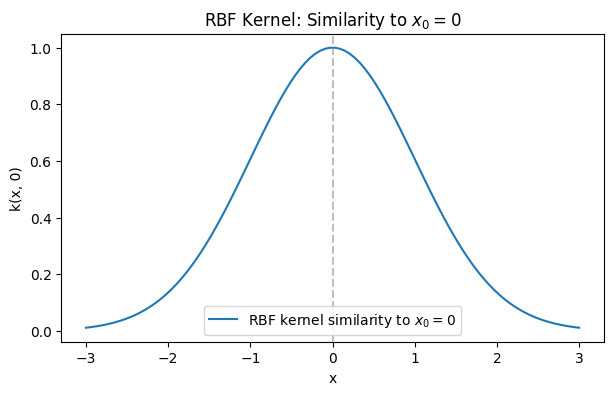

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 1D input space
X = np.linspace(-3, 3, 100)[:, None]
x0 = np.array([[0.0]])  # Reference point


# RBF kernel function
def rbf_kernel(x1, x2, sigma=1.0, lengthscale=1.0):
    sqdist = np.sum((x1 - x2) ** 2, axis=-1)
    return sigma**2 * np.exp(-0.5 * sqdist / lengthscale**2)


# Compute similarity to x0
similarity = np.array(
    [rbf_kernel(x0, x.reshape(1, -1), sigma=1.0, lengthscale=1.0) for x in X]
)

plt.figure(figsize=(7, 4))
plt.plot(X, similarity, label="RBF kernel similarity to $x_0=0$")
plt.axvline(0, color="gray", linestyle="--", alpha=0.5)
plt.xlabel("x")
plt.ylabel("k(x, 0)")
plt.title("RBF Kernel: Similarity to $x_0=0$")
plt.legend()
plt.show()

**Interpretation:**  
- Points near $x_0=0$ have high similarity (close to 1).
- Points far from $x_0=0$ have low similarity (close to 0).
- The kernel is a smooth, bell-shaped function centered at $x_0$.

---

### 5. **Sampling Functions from a GP with RBF Kernel**

Let's see what kind of functions the RBF kernel produces in a Gaussian Process:

In [15]:
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0)

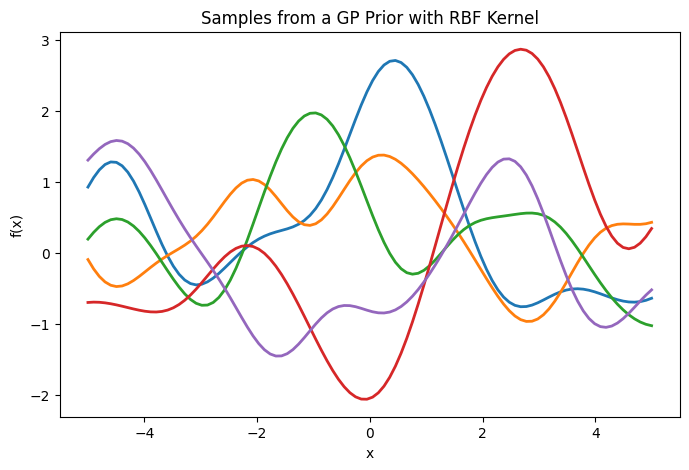

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Generate points
X = np.linspace(-5, 5, 100)[:, None]
# Compute kernel matrix (avoid name conflict with existing K)
kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0)
K_prior = kernel(X, X)
# Sample functions from the GP prior
samples = np.random.multivariate_normal(mean=np.zeros(100), cov=K_prior, size=5)

plt.figure(figsize=(8, 5))
for i in range(5):
    plt.plot(X, samples[i], lw=2)
plt.title("Samples from a GP Prior with RBF Kernel")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()



**Interpretation:**  
- All sampled functions are smooth.
- The RBF kernel encodes the assumption that the function varies smoothly, with the lengthscale controlling how quickly it can change.

---

### 6. **Summary Table**

| Kernel Function         | Feature Map $\phi(x)$         | Dimensionality      | Kernel Trick? |
|------------------------|-------------------------------|---------------------|---------------|
| Linear: $x^T x'$       | $x$                           | Finite ($d$)        | Not needed    |
| Polynomial: $(1 + x^T x')^d$ | All monomials up to $d$ | Finite              | Optional      |
| RBF: $\exp(-\|x-x'\|^2/2\ell^2)$ | Infinite (all monomials, sines/cosines, etc.) | Infinite | **Essential** |

---

### 7. **Key Takeaways**

- **Mercer's theorem**: Every valid kernel is an inner product in some (possibly infinite) feature space.
- **Kernel trick**: Compute inner products via the kernel function, avoiding explicit feature computation.
- **RBF kernel**: Infinite-dimensional feature space, but kernel trick makes it practical.
- **GPs with RBF kernel**: Model smooth functions, with uncertainty and flexibility.

---

In [6]:
import jax.numpy as jnp


# Let's implement the squared exponential kernel in Python using JAX:

def squared_exponential_kernel(
    x1: jnp.ndarray, x2: jnp.ndarray, sigma: float = 1.0, lengthscale: float = 1.0
) -> jnp.ndarray:
    """
    Computes the Squared Exponential (RBF) kernel matrix between two sets of points.

    Args:
        x1: First set of input points. Shape (N1, D).
        x2: Second set of input points. Shape (N2, D).
        sigma: Output variance (amplitude) hyperparameter.
        lengthscale: Length scale hyperparameter.

    Returns:
        The kernel matrix K, where K[i, j] = k(x1[i], x2[j]). Shape (N1, N2).
    """
    # Ensure inputs are JAX arrays and have at least 2 dimensions (N, D)
    x1 = jnp.atleast_2d(x1)
    x2 = jnp.atleast_2d(x2)

    # Compute the squared Euclidean distance between all pairs of points
    # (N1, 1, D) - (1, N2, D) -> (N1, N2, D)
    # Sum over the last dimension to get squared distance: (N1, N2)
    sq_dist = jnp.sum((x1[:, None, :] - x2[None, :, :]) ** 2, axis=-1)

    # Compute the kernel matrix using the RBF formula
    K = sigma**2 * jnp.exp(-0.5 * sq_dist / lengthscale**2)

    return K


# Example usage:
points1 = jnp.array([[0.0], [1.0], [2.0]])
points2 = jnp.array([[0.5], [1.5]])
kernel_matrix = squared_exponential_kernel(points1, points2, sigma=1.0, lengthscale=0.5)
print("Kernel Matrix:\n", kernel_matrix)


Kernel Matrix:
 [[0.60653067 0.011109  ]
 [0.60653067 0.60653067]
 [0.011109   0.60653067]]


## Gaussian Process Regression

Now that we understand what a GP is and how kernels work, let's use it for regression.

Suppose we have a set of training data $(X_{\text{train}}, y_{\text{train}})$, where $X_{\text{train}}$ are the input points and $y_{\text{train}}$ are the corresponding noisy observations. We want to predict the function value at new test points $X_{\text{test}}$.

The key idea in GP regression is to consider the **joint distribution** of the training outputs $y_{\text{train}}$ and the function values at the test points $f_{\text{test}}$. Since the training data is assumed to be generated by a function drawn from a GP with added Gaussian noise, and the test function values are also from the same GP, their joint distribution is a multivariate Gaussian:

$$
\begin{pmatrix}
y_{\text{train}} \\
f_{\text{test}}
\end{pmatrix}
\sim
\mathcal{N}\left(
\begin{pmatrix}
m(X_{\text{train}}) \\
m(X_{\text{test}})
\end{pmatrix},
\begin{pmatrix}
K_{\text{train,train}} + \sigma_{\text{noise}}^2 I & K_{\text{train,test}} \\
K_{\text{test,train}} & K_{\text{test,test}}
\end{pmatrix}
\right)
$$

where:

- $m(\cdot)$ is the mean function.
- $K_{\text{train,train}}$ is the kernel matrix evaluated at the training inputs $X_{\text{train}}$.
- $K_{\text{test,test}}$ is the kernel matrix evaluated at the test inputs $X_{\text{test}}$.
- $K_{\text{train,test}}$ is the cross-covariance matrix between training and test inputs.
- $K_{\text{test,train}}$ is the transpose of $K_{\text{train,test}}$.
- $\sigma_{\text{noise}}^2$ is the variance of the observational noise.

Our goal is to find the **conditional distribution** of the test function values $f_{\text{test}}$ given the training data $(X_{\text{train}}, y_{\text{train}})$. For jointly Gaussian variables, this conditional distribution is also Gaussian:

$$
p(f_{\text{test}} \mid X_{\text{train}}, y_{\text{train}}, X_{\text{test}})
= \mathcal{N}(f_{\text{test}}; \mu_{\text{pred}}, \Sigma_{\text{pred}})
$$

The formulas for the predictive mean $\mu_{\text{pred}}$ and predictive covariance $\Sigma_{\text{pred}}$ are:

$$
\mu_{\text{pred}} = m(X_{\text{test}}) + K_{\text{test,train}} \left[ K_{\text{train,train}} + \sigma_{\text{noise}}^2 I \right]^{-1} (y_{\text{train}} - m(X_{\text{train}}))
$$

$$
\Sigma_{\text{pred}} = K_{\text{test,test}} - K_{\text{test,train}} \left[ K_{\text{train,train}} + \sigma_{\text{noise}}^2 I \right]^{-1} K_{\text{train,test}}
$$
These equations are the core of GP regression prediction:

- The first term in the predictive mean is the prior mean, and the second term is an adjustment based on the observed training data.
- The predictive covariance shows that the uncertainty is reduced by observing data.

This means that, in standard Gaussian Process regression, we do need to keep the training data (or at least the kernel matrix involving the training data) around for making predictions. This is because the predictive mean and covariance at new test points depend on the kernel evaluations between the test points and all training points, as well as the observed outputs $y_{\text{train}}$.

- **Why?**  
    The GP posterior is a function of the entire training dataset. Each prediction at a new point uses the correlations (via the kernel) between that point and all training points to compute both the mean and uncertainty.

- **Implication:**  
    For large datasets, this can become computationally expensive (memory and time scale with the number of training points). There are various approximate methods (like sparse GPs, inducing points, or kernel approximations) that address this limitation for scalability.

**Summary:**  
- Standard GP regression requires access to the training data (or kernel matrices involving them) at prediction time.
- This is a key difference from parametric models, where you can discard the training data after fitting.  
- For large-scale problems, special scalable GP methods are used to avoid this bottleneck.

Let's implement this prediction step in Python:

In [3]:
import jax.numpy as jnp
from jax.scipy.linalg import solve  # Use JAX's solve for numerical stability


def gp_predict(
    X_train: jnp.ndarray,
    y_train: jnp.ndarray,
    X_test: jnp.ndarray,
    mean_func: Callable[[jnp.ndarray], jnp.ndarray],
    kernel_func: Callable[[jnp.ndarray, jnp.ndarray], jnp.ndarray],
    noise_variance: float = 1e-6,  # Small value for numerical stability if noise is zero
) -> tuple[jnp.ndarray, jnp.ndarray]:
    """
    Performs Gaussian Process regression prediction.

    Args:
        X_train: Training input points. Shape (N_train, D).
        y_train: Training output values. Shape (N_train,).
        X_test: Test input points. Shape (N_test, D).
        mean_func: Mean function.
        kernel_func: Kernel function.
        noise_variance: Variance of the observational noise.

    Returns:
        A tuple containing:
            mu_pred: Predictive mean at test points. Shape (N_test,).
            Sigma_pred: Predictive covariance matrix at test points. Shape (N_test, N_test).
    """
    # Ensure inputs are JAX arrays and have at least 2 dimensions for inputs
    X_train = jnp.atleast_2d(X_train)
    X_test = jnp.atleast_2d(X_test)
    y_train = jnp.atleast_1d(y_train)  # Ensure y_train is at least 1D

    # Compute kernel matrices
    K_train_train = kernel_func(X_train, X_train) + noise_variance * jnp.eye(
        X_train.shape[0]
    )
    K_test_train = kernel_func(X_test, X_train)
    K_test_test = kernel_func(X_test, X_test)

    # Compute the term (K_train_train + sigma_noise^2 I)^-1 (y_train - m(X_train))
    # Use jax.scipy.linalg.solve for numerical stability instead of direct inversion
    K_train_train_inv_y_diff = solve(K_train_train, y_train - mean_func(X_train))

    # Compute predictive mean
    mu_pred = mean_func(X_test) + jnp.dot(K_test_train, K_train_train_inv_y_diff)

    # Compute the term (K_train_train + sigma_noise^2 I)^-1 K_test_train^T
    K_train_train_inv_K_test_train_T = solve(K_train_train, K_test_train.T)

    # Compute predictive covariance
    Sigma_pred = K_test_test - jnp.dot(K_test_train, K_train_train_inv_K_test_train_T)

    return mu_pred, Sigma_pred


In [19]:
import jax.random as random
import matplotlib.pyplot as plt
import jax.numpy as jnp

# Set a random seed for reproducibility
key = random.PRNGKey(0)

# --- 1. Generate Synthetic Data ---
# Let's create some data from a sine wave with added noise
num_train_points = 15
X_train = jnp.sort(
    random.uniform(key, shape=(num_train_points, 1), minval=-5.0, maxval=5.0)
)  # Training inputs
true_noise_variance = 0.5**2  # Variance of the synthetic noise
noise = random.normal(key, shape=X_train.shape) * jnp.sqrt(true_noise_variance)
y_train = jnp.sin(X_train[:, 0]) + noise[:, 0]  # Training outputs (add noise)

# --- 2. Define GP Components ---
# We'll use a zero mean function for simplicity
zero_mean_func = lambda x: jnp.zeros(x.shape[0])

# We'll use the Squared Exponential kernel
# Let's choose some hyperparameters (these would typically be learned)
kernel_sigma = 1.0
kernel_lengthscale = 1.0
rbf_kernel = lambda x1, x2: squared_exponential_kernel(
    x1, x2, sigma=kernel_sigma, lengthscale=kernel_lengthscale
)

# Assume we know the noise variance for the GP model (in a real scenario, this might also be learned)
model_noise_variance = true_noise_variance

# --- 3. Generate Test Points ---
# Create a dense set of points to plot the predictive distribution
num_test_points = 100
X_test = jnp.linspace(-6.0, 6.0, num_test_points)[:, None]  # Test inputs

# --- 4. Perform GP Prediction ---
mu_pred, Sigma_pred = gp_predict(
    X_train,
    y_train,
    X_test,
    zero_mean_func,
    rbf_kernel,
    noise_variance=model_noise_variance,
)

# The diagonal of the predictive covariance matrix gives the variance at each test point
predictive_variance = jnp.diag(Sigma_pred)
predictive_std = jnp.sqrt(predictive_variance)


In [20]:
# --- 5. Plot Results with Plotly ---
import plotly.graph_objects as go

fig = go.Figure()

# Plot training data
fig.add_trace(
    go.Scatter(
        x=X_train[:, 0],
        y=y_train,
        mode="markers",
        name="Training Data",
        marker=dict(color="blue", size=8),
    )
)

# Plot predictive mean
fig.add_trace(
    go.Scatter(
        x=X_test[:, 0],
        y=mu_pred,
        mode="lines",
        name="Predictive Mean",
        line=dict(color="red"),
    )
)

# Plot 95% confidence interval (mean +/- 2 std)
fig.add_trace(
    go.Scatter(
        x=X_test[:, 0],
        y=mu_pred + 2 * predictive_std,
        mode="lines",
        line=dict(width=0),
        showlegend=False,
    )
)
fig.add_trace(
    go.Scatter(
        x=X_test[:, 0],
        y=mu_pred - 2 * predictive_std,
        mode="lines",
        fill="tonexty",
        fillcolor="rgba(255,0,0,0.2)",
        line=dict(width=0),
        name="95% Confidence Interval",
    )
)

fig.update_layout(
    title="Gaussian Process Regression Example",
    xaxis_title="Input (x)",
    yaxis_title="Output (y)",
    legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01),
    width=900,
    height=500,
    template="simple_white",
)
fig.show()


## Summary of Gaussian Processes

To wrap up this introductory look at **Gaussian Processes (GPs)**:

- **GPs are a non-parametric approach**, meaning they don't learn a fixed, finite set of parameters like traditional models.  
- Instead, they define a **probability distribution directly over the space of functions**.
- A GP is fully specified by its **mean function** $m(x)$ and its **covariance function (kernel)** $k(x, x')$.
- The **kernel is key**; it defines the relationship between function values at different points and encodes assumptions about the function's properties (like smoothness).
- Valid kernels can be understood as **inner products in a potentially infinite-dimensional feature space** (the kernel trick allows us to work with this implicitly):  
    $$
    k(x, x') = \langle \phi(x), \phi(x') \rangle
    $$
- **GP regression** involves computing the **conditional Gaussian distribution** of function values at test points, given the training data.
- The **predictive mean** gives the most likely function value, and the **predictive covariance** provides a measure of uncertainty:
    $$
    \mu_{\text{pred}} = m(X_{\text{test}}) + K_{\text{test,train}} [K_{\text{train,train}} + \sigma_{\text{noise}}^2 I]^{-1} (y_{\text{train}} - m(X_{\text{train}}))
    $$
    $$
    \Sigma_{\text{pred}} = K_{\text{test,test}} - K_{\text{test,train}} [K_{\text{train,train}} + \sigma_{\text{noise}}^2 I]^{-1} K_{\text{train,test}}
    $$
- While the core idea is elegant, implementing GP regression involves matrix operations (like inversion or solving linear systems) that can be computationally expensive, scaling cubically with the number of training data points ($O(N^3)$). This is a key consideration for large datasets.

---

This is just the beginning of exploring Gaussian Processes! There are many different types of kernels, methods for optimizing hyperparameters (like the length scale and output variance), and extensions to classification and other tasks.

I hope this detailed breakdown and the accompanying code examples are helpful for your blog post and your learning journey!